In [1]:
# !git clone https://github.com/correlllab/magpie_control.git
# !pip install -e magpie_control
from magpie_control import realsense_wrapper as real
import numpy as np
from PIL import Image

rsc = real.RealSense(device_name='D405')
rsc.initConnection()

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
# from magpie_perception.label_dino import LabelDINO
from magpie_perception.label_dino import LabelDINO
# path = "google/owlvit-base-patch32"
# label_vit = LabelOWLViT(pth=path, topk=3)
label_dino = LabelDINO(topk=3)

/home/will/.local/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/will/.local/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
2025-02-11 11:41:10.873078: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-11 11:41:10.904627: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-11 11:41:10.904651: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to 

In [3]:
p, rgbd_image = rsc.getPCD()
image = np.array(rgbd_image.color)
image = Image.fromarray(image)


['yellow block. [SEP]' 'yellow block. [SEP]' 'yellow block. [SEP]'
 'yellow block. [SEP]' 'yellow block. [SEP]' 'yellow block. [SEP]'
 'yellow block. [SEP]' 'yellow block. [SEP]' 'yellow block. [SEP]'
 'yellow block. [SEP]' 'block. [SEP]' 'yellow block. [SEP]' 'yellow block'
 'yellow block.' 'yellow block' 'yellow block.' 'yellow block. [SEP]'
 'yellow block. [SEP]' 'yellow block. [SEP]' 'yellow block. [SEP]'
 'yellow block' 'yellow block. [SEP]' 'yellow block' 'yellow block'
 'yellow block. [SEP]' 'yellow block. [SEP]' 'yellow block'
 'yellow block. [SEP]' 'yellow block. [SEP]' 'block [SEP]' 'yellow block'
 'yellow block [SEP]' 'yellow block. [SEP]' 'yellow block' 'yellow block'
 '. [SEP]' 'yellow block' 'yellow block. [SEP]' 'yellow block'
 'yellow block' 'yellow block' 'yellow block' 'yellow block'
 'yellow block' 'yellow block' 'yellow block' 'yellow block'
 'yellow block' 'yellow block' 'yellow block' 'yellow block'
 'yellow block' 'yellow block [SEP]' '[SEP]' 'yellow block [SEP]'

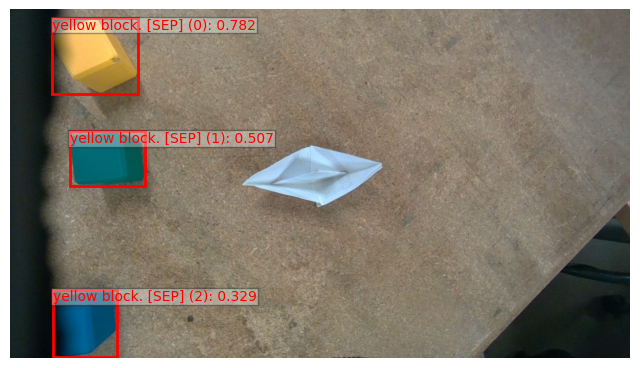

In [4]:
import numpy as np
from PIL import Image
# image = Image.open("test.jpg").convert("RGB")
image = np.array(image)
label_dino.set_threshold(0.001)
queries = ["a red block", "a blue block", "yellow block"]
queries = ["yellow block"]
abbrevq = ["yellow block"]
results, boxes, scores, labels = label_dino.label(image, queries, abbrevq, plot=True, topk=True)


In [23]:
import importlib
import mask_sam2 as ms2
importlib.reload(ms2)


<module 'mask_sam2' from '/home/will/workspace/magpie_perception/src/magpie_perception/mask_sam2.py'>

In [24]:
import sys
sys.path.append("../")
# from src.magpie_perception.mask_sam2 import MaskSAM2
from magpie_perception.mask_sam2 import MaskSAM2
mask_sam2 = MaskSAM2("facebook/sam2.1-hiera-large")

In [25]:
mask_sam2.set_image_and_labels(np.array(rgbd_image.color), np.array([np.array(i[0]) for i in boxes]), labels)

/home/will/.local/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [26]:
boxes

array([[  86.67111 ,   17.472376,  263.48355 ,  173.82314 ],
       [ 122.91052 ,  251.67809 ,  277.65387 ,  363.70746 ],
       [  87.733604,  578.1221  ,  220.69427 ,  716.9262  ],
       ...,
       [1248.6677  ,    6.398399, 1278.828   ,  472.2924  ],
       [ 249.78125 ,  250.82774 ,  333.1833  ,  372.59445 ],
       [  26.434418,  121.06807 ,  110.268364,  228.60263 ]],
      dtype=float32)

In [27]:
masks = mask_sam2.get_masks(labels, boxes)

[[  86.67111     17.472376   263.48355    173.82314  ]
 [ 122.91052    251.67809    277.65387    363.70746  ]
 [  87.733604   578.1221     220.69427    716.9262   ]
 [ 478.90497    279.1337     770.1886     409.3861   ]
 [  65.792656     2.2927737 1274.4904     717.3204   ]
 [1246.0554     397.65973   1278.6735     468.68195  ]
 [  87.45255     17.87783    224.21494    146.7955   ]
 [ 175.59009     29.81572    263.9842     170.80301  ]
 [  90.298325   602.7951     175.05225    716.92737  ]
 [ 141.92706     29.537075   264.60965    173.71686  ]]


(-0.5, 1279.5, 719.5, -0.5)

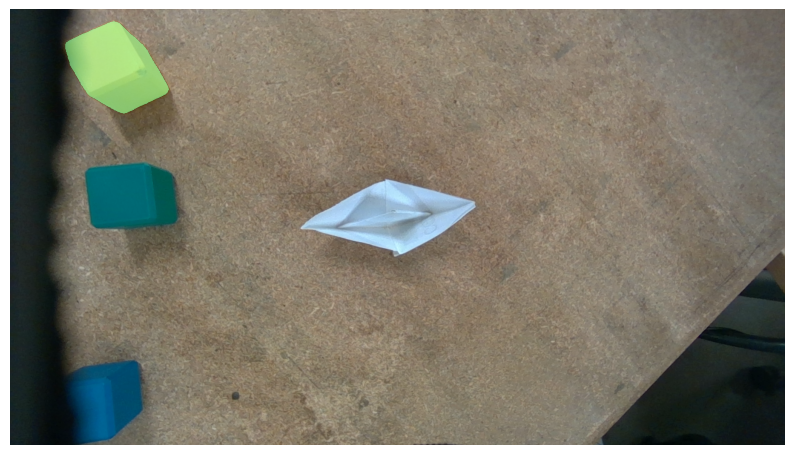

In [31]:
import matplotlib.pyplot as plt

def show_mask(mask, ax, random_color=False):
    '''
    @param mask bool image mask
    @param ax matplotlib fig
    '''
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)


plt.figure(figsize=(10, 10))
plt.imshow(image)
for mask in mask_sam2.masks[:1]:
    show_mask(mask, plt.gca(), random_color=True)
plt.axis('off')